# Introduction:
**We will dive into features which might cause HeartDisease and gonna try to build a trusted  model to predict individual liklihood of developing a HeartDisease**

**As we are going we will dive into what is balancing ratio of specific features and our target?**

**What are the most effictive features?**

**does our data set contain outliers?**

**Can we build a trusted machine learning model?**

**wahat are proportions of some features?**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**read the csv file into a df and getting an over view**

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**RestingBP:
resting blood pressure**

**Cholesterol:
serum cholesterol**

**FastingBS:
fasting blood sugar**

**RestingECG:
resting electrocardiogram results**

**MaxHR:
maximum heart rate achieved**

In [3]:
df.shape #shape of our data set contains 918 rows and 12 features

(918, 12)

In [4]:
df.isnull().sum() #checking for null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
#checking for duplicated rows 
check = pd.DataFrame(df,columns=df.columns)
duplicate = check[check.duplicated(keep='last')]  
duplicate

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


**Unique values in discerete & qualitative columns**

In [6]:
Columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
for c in Columns:
    Uni = df[c].unique()
    print(' ')
    print (c)
    print (Uni)

 
Sex
['M' 'F']
 
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
 
RestingECG
['Normal' 'ST' 'LVH']
 
ExerciseAngina
['N' 'Y']
 
ST_Slope
['Up' 'Flat' 'Down']
 
HeartDisease
[0 1]


In [7]:
df.info() # checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
def bar_chart(df,feature):
    #Preparing parameters for plot
    type_counts = df[feature].value_counts()
    type_order = type_counts.index
    base_color = sns.color_palette()[0]
    n = df_copy[feature].value_counts().sum()
    #Plot
    sns.countplot(data=df, x= feature, color=base_color, order=type_order);

    type_counts = df[feature].value_counts()
    
    #Labeling
    locs, labels = plt.xticks(rotation=90) 
    for loc, label in zip(locs, labels):
        count = type_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n)
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

# Univariate section

**Is data set balanced?**

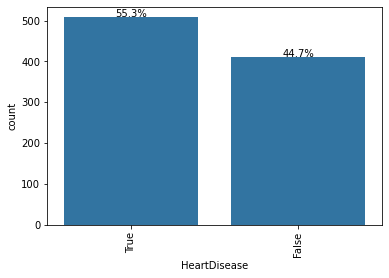

In [10]:
df_copy = df.copy()
df_copy['HeartDisease'] = df['HeartDisease'].astype(bool).astype(str)
bar_chart(df_copy,'HeartDisease')

**Ratio of HeartDisease is approximately balanced**

**Is gender feature is balanced in our data set?**

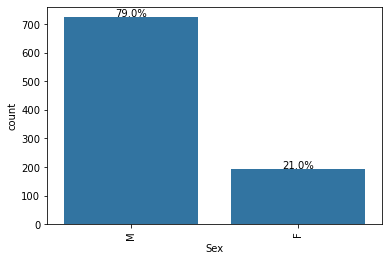

In [11]:
bar_chart(df,'Sex')

**Propotion of Males to Females is 79% in our data set**

**what is propotions of ChestPainType in data set?**

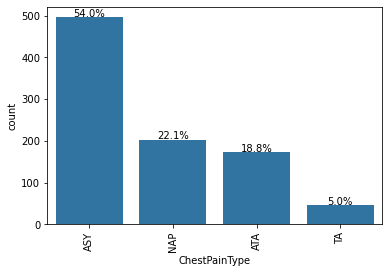

In [12]:
bar_chart(df,'ChestPainType')

**ASY the most common type of pain and TA the least**

**what is propotion of RestingECG?**

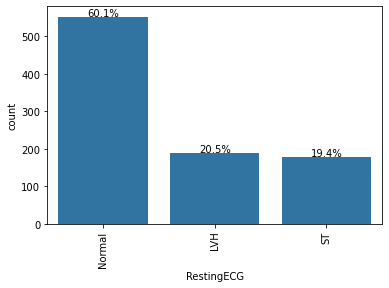

In [13]:
bar_chart(df,'RestingECG')

**Normal is the most common**

**plot function taken from https://www.kaggle.com/andreshg/xgboost-optuna-hyperparameter-tunning**

In [14]:
def plotting_chart(df, features):
    # Making a chart and parameters like figsize
    
    style.use('fivethirtyeight')
    fig = plt.figure(constrained_layout=True, figsize=(20,20))
    
    # Making 3 columns and 3 rows for graphs
    
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    
    # Preparing histogram
    ax1.set_title('Histogram') # Set the title
    sns.distplot(df.loc[:,features], norm_hist=True, ax = ax1) # plot the histogram
    
    #QQ_plot
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot') # Set the title
    
    stats.probplot(df.loc[:,features], plot = ax2)# Plotting the QQ_Plot
    #Box Plot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot') # Set title
    sns.boxplot(df.loc[:,features], orient='v', ax = ax3 ); # Plotting the box plot

**Age feature doeesn't contain outliers and normally distributed from 28 to 77 years old**

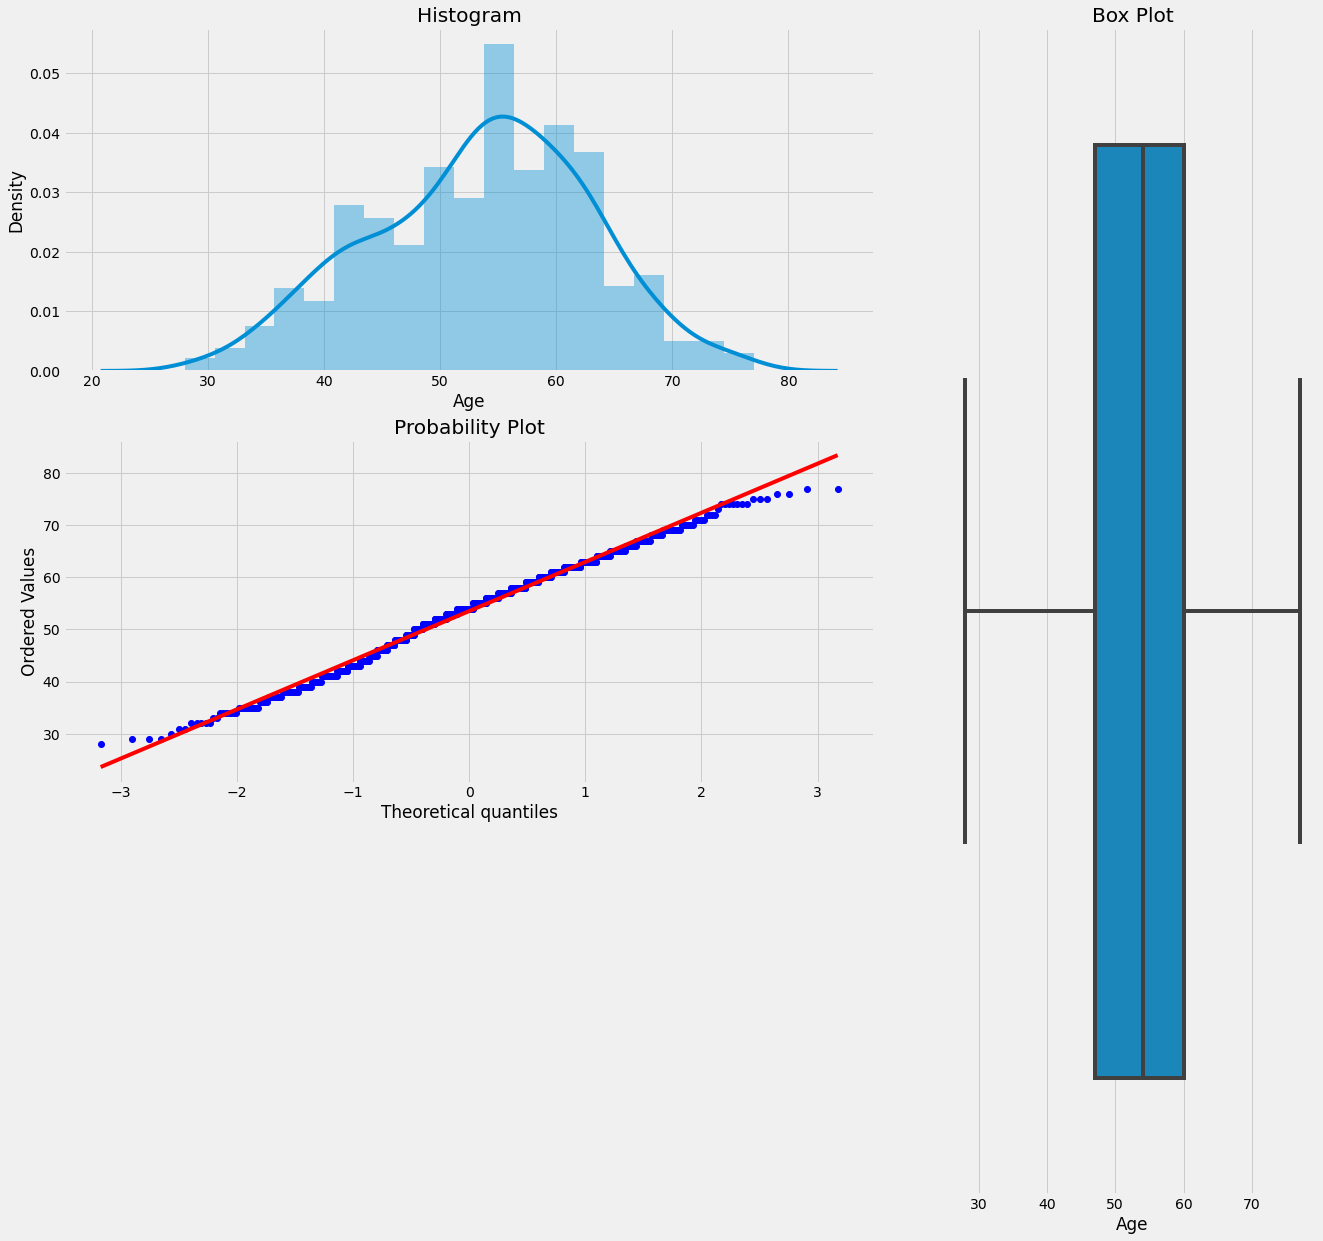

In [15]:
plotting_chart(df,'Age');

**Heart rate looks normal**

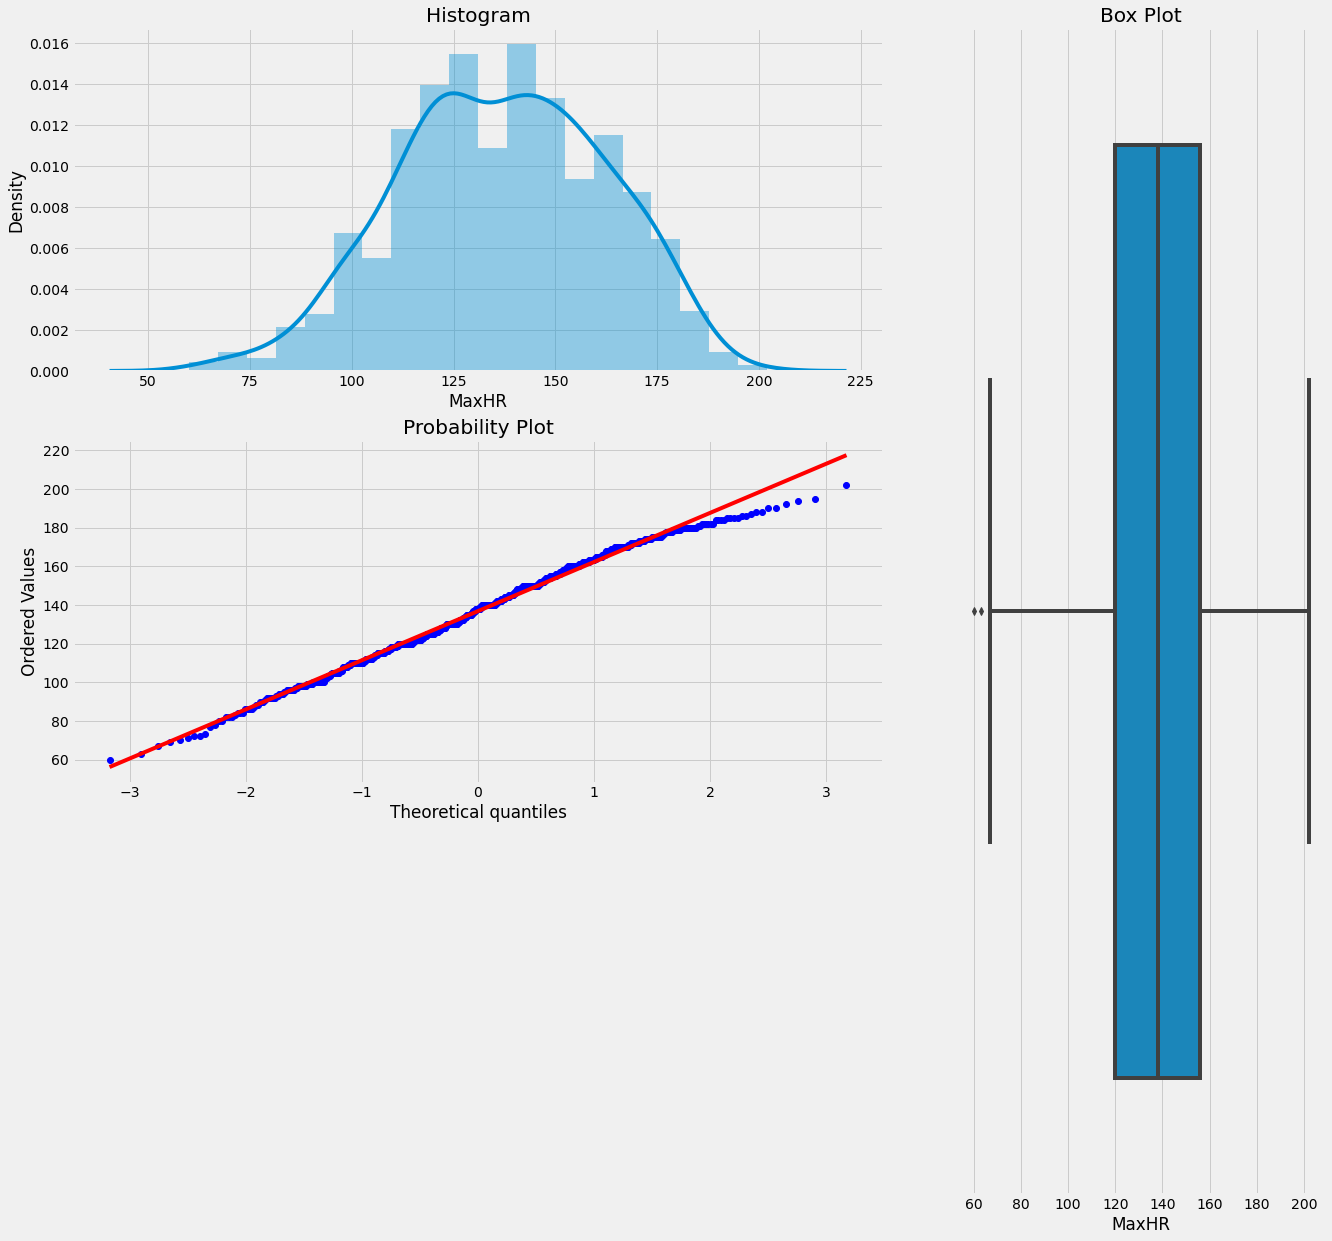

In [16]:
plotting_chart(df,'MaxHR');

**Cholesterol contains unwanted obeservations at 0 and 600 gonna drop them**

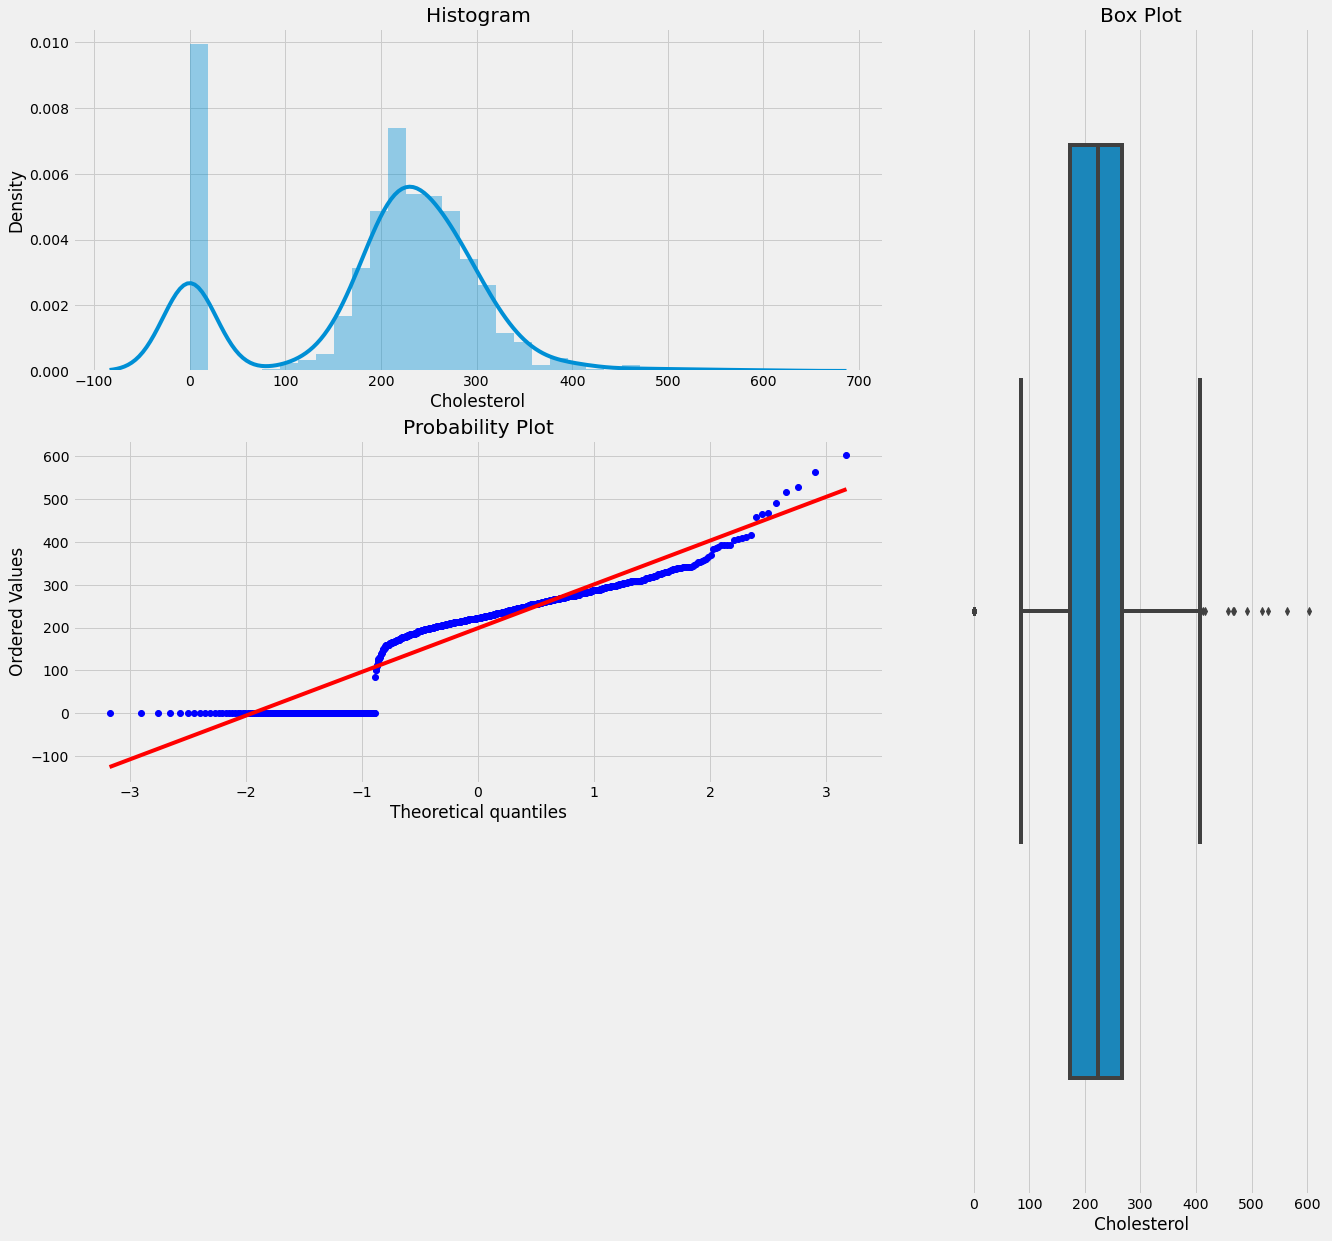

In [17]:
plotting_chart(df,'Cholesterol')

In [18]:
df = df.drop(df.query("Cholesterol == 0 or Cholesterol >=600").index.tolist()) #dropping outliers

**Oldpeak has outliers smaller than 0 and greater than 6 we gonna drop them**

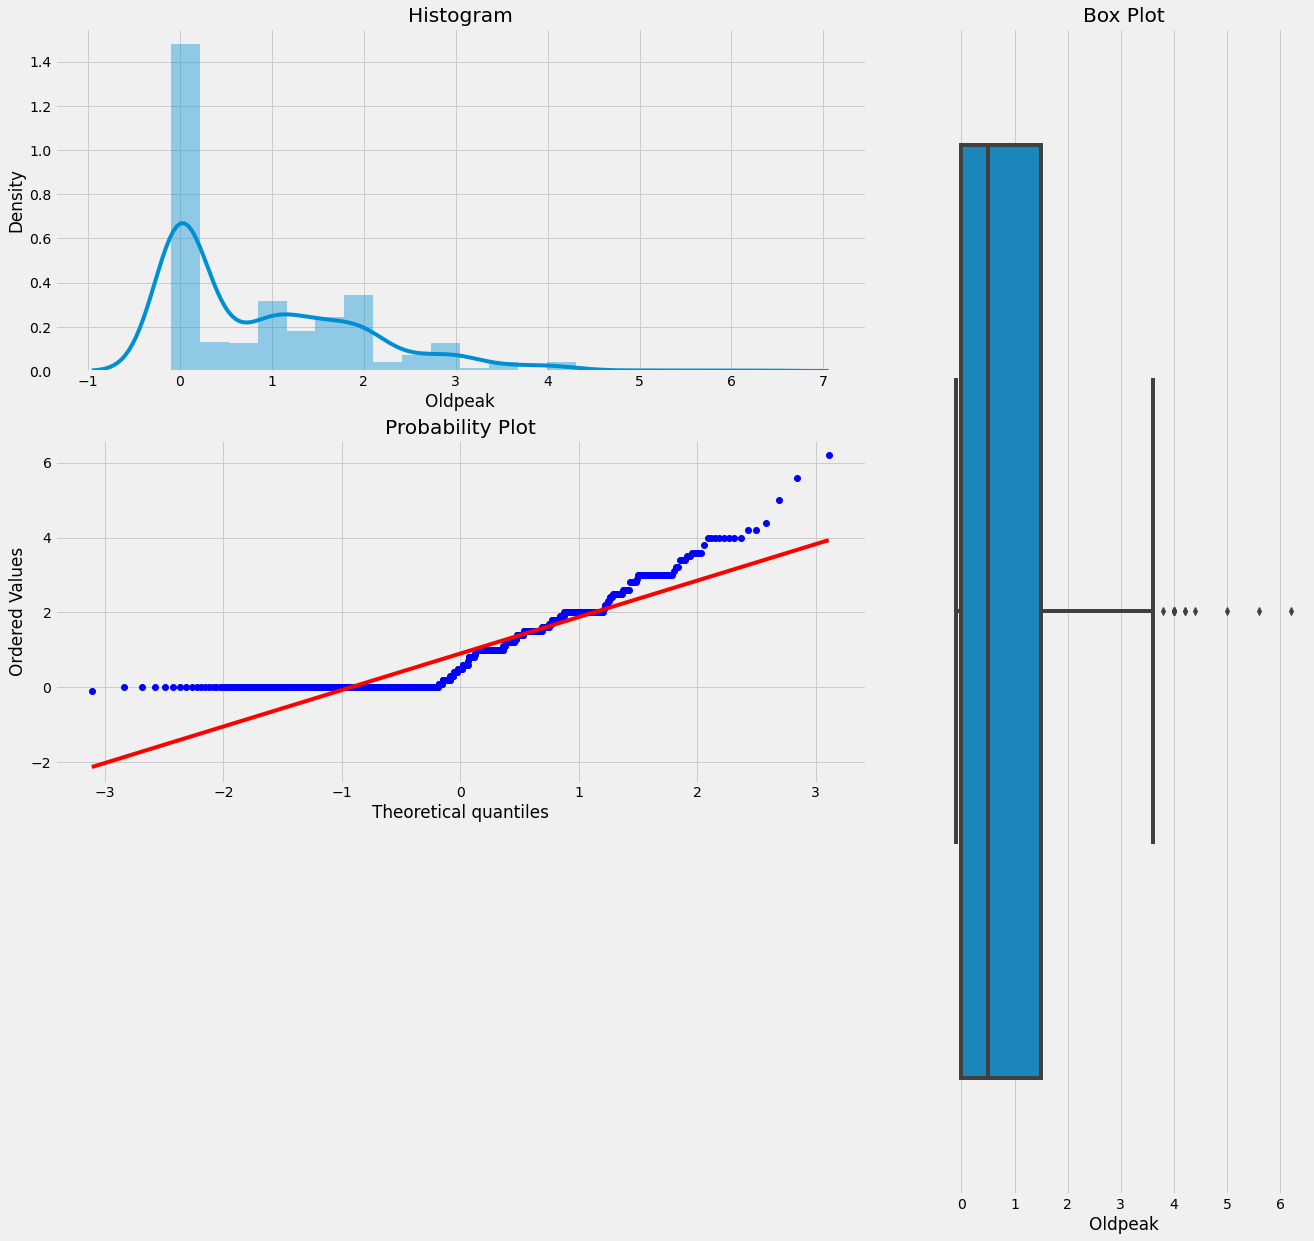

In [19]:
plotting_chart(df,'Oldpeak')

In [20]:
df = df.drop(df.query("Oldpeak < 0 or Oldpeak > 6").index.tolist()) #dropping outliers

**RestingBP has outliers smaller than 80 and greater than 200 we gonna drop them**

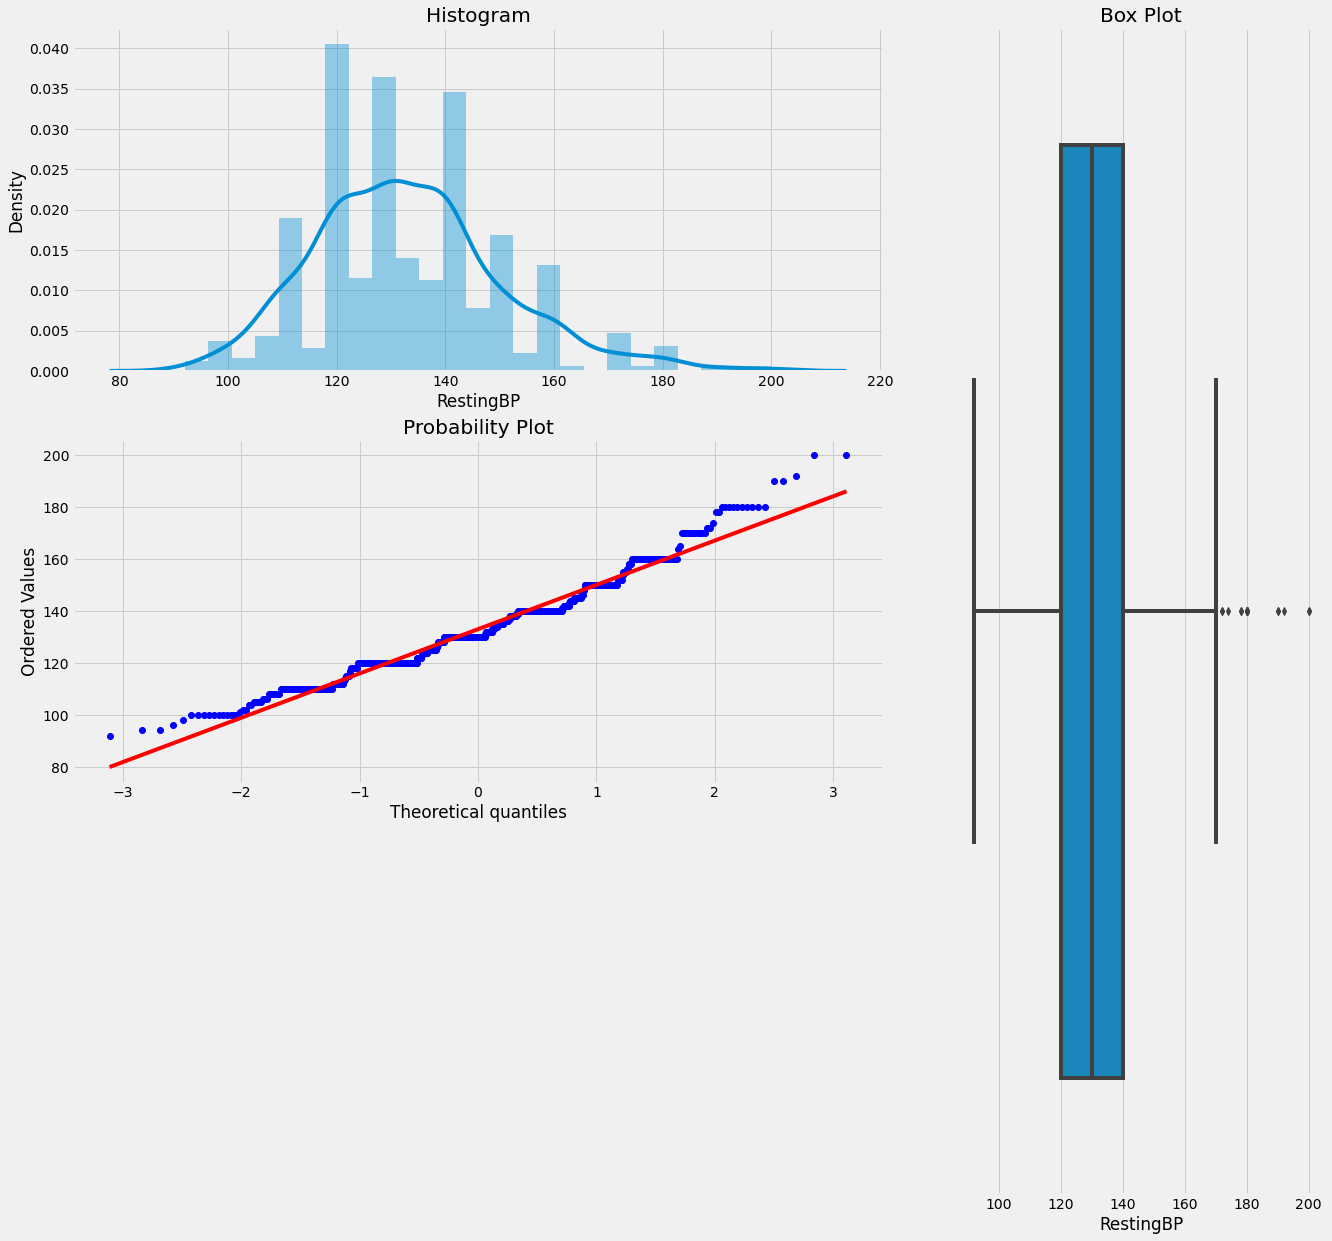

In [21]:
plotting_chart(df,'RestingBP')

In [22]:
df = df.drop(df.query("RestingBP < 80 or RestingBP >= 200").index.tolist()) #dropping outliers

In [23]:
df#after cleaning

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [40]:
def make_mi_scores(X,Target):
    for i in range(10):
        X = df.copy()
        y = X.pop(Target)
        for colname in X.select_dtypes("object"):
            # Label encoding Qualitative features
            X[colname], _ = X[colname].factorize()
        discrete_features = X.dtypes == int # All discrete features should now have integer dtypes
        
        mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
        mi_scores = np.append([mi_scores], [mi_scores], axis=0)
        
    mi_scores = mi_scores.mean(axis=0) # mean of appended values
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)   
    return mi_scores

mi_scores = make_mi_scores(df, 'HeartDisease')

# Bivariate  section

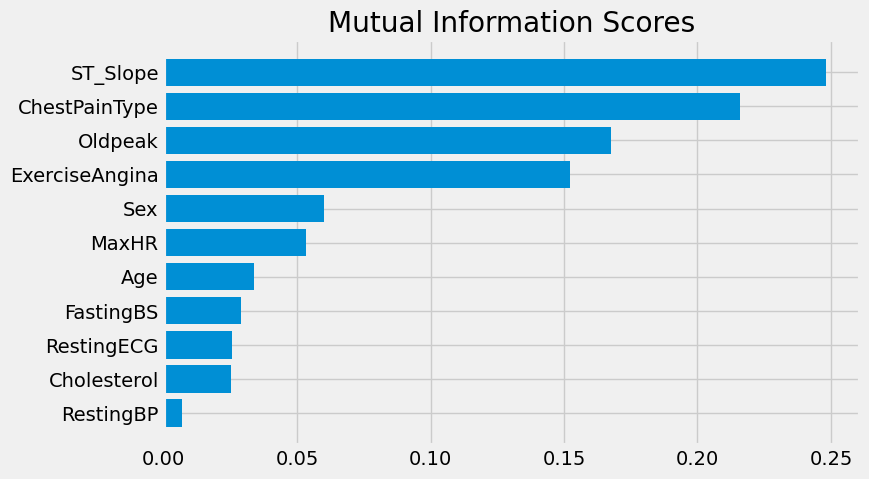

In [41]:
def plot_mi_scores(scores):
    #Preparing to plot
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

**Feature engineering from mutual information we found ST_Slope has the most effect in heart diseas and [Resting ECG,Cholestrol, Resting BP]  most likley to have no effect**

In [26]:
label_encoding_col = ['Sex','ChestPainType' , 'RestingECG' , 'ST_Slope']
df['ExerciseAngina'].loc[df.query("ExerciseAngina == 'N'").index.tolist()] = 0
df['ExerciseAngina'].loc[df.query("ExerciseAngina == 'Y'").index.tolist()] = 1
df['ExerciseAngina'] = df['ExerciseAngina'].astype('int64')
#Qualitative Nominal encoding
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
df_copy = df.copy()   
df_copy = MultiColumnLabelEncoder(label_encoding_col).fit_transform(df_copy)
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


**correlation Heat-map**

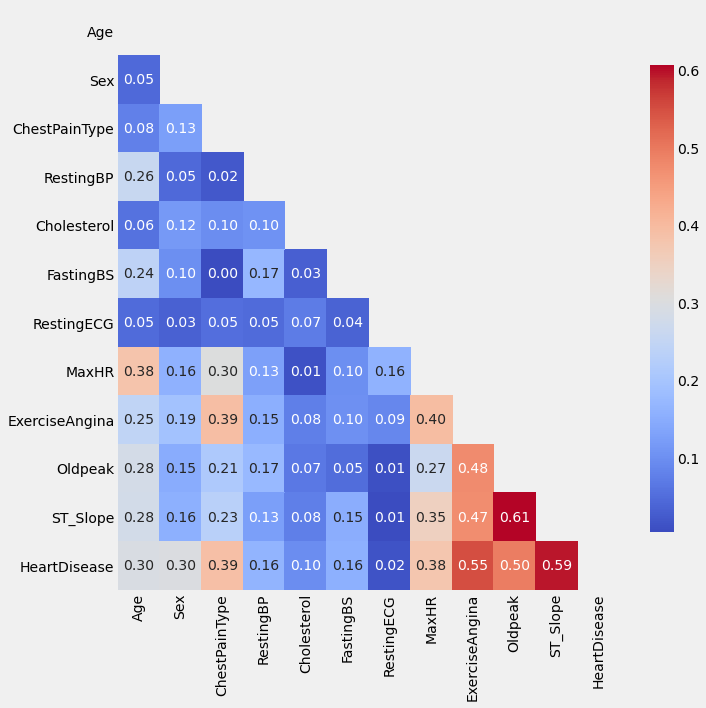

In [27]:
col_features = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
corr = df_copy[col_features].corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8})
plt.yticks(rotation=0)
plt.show()

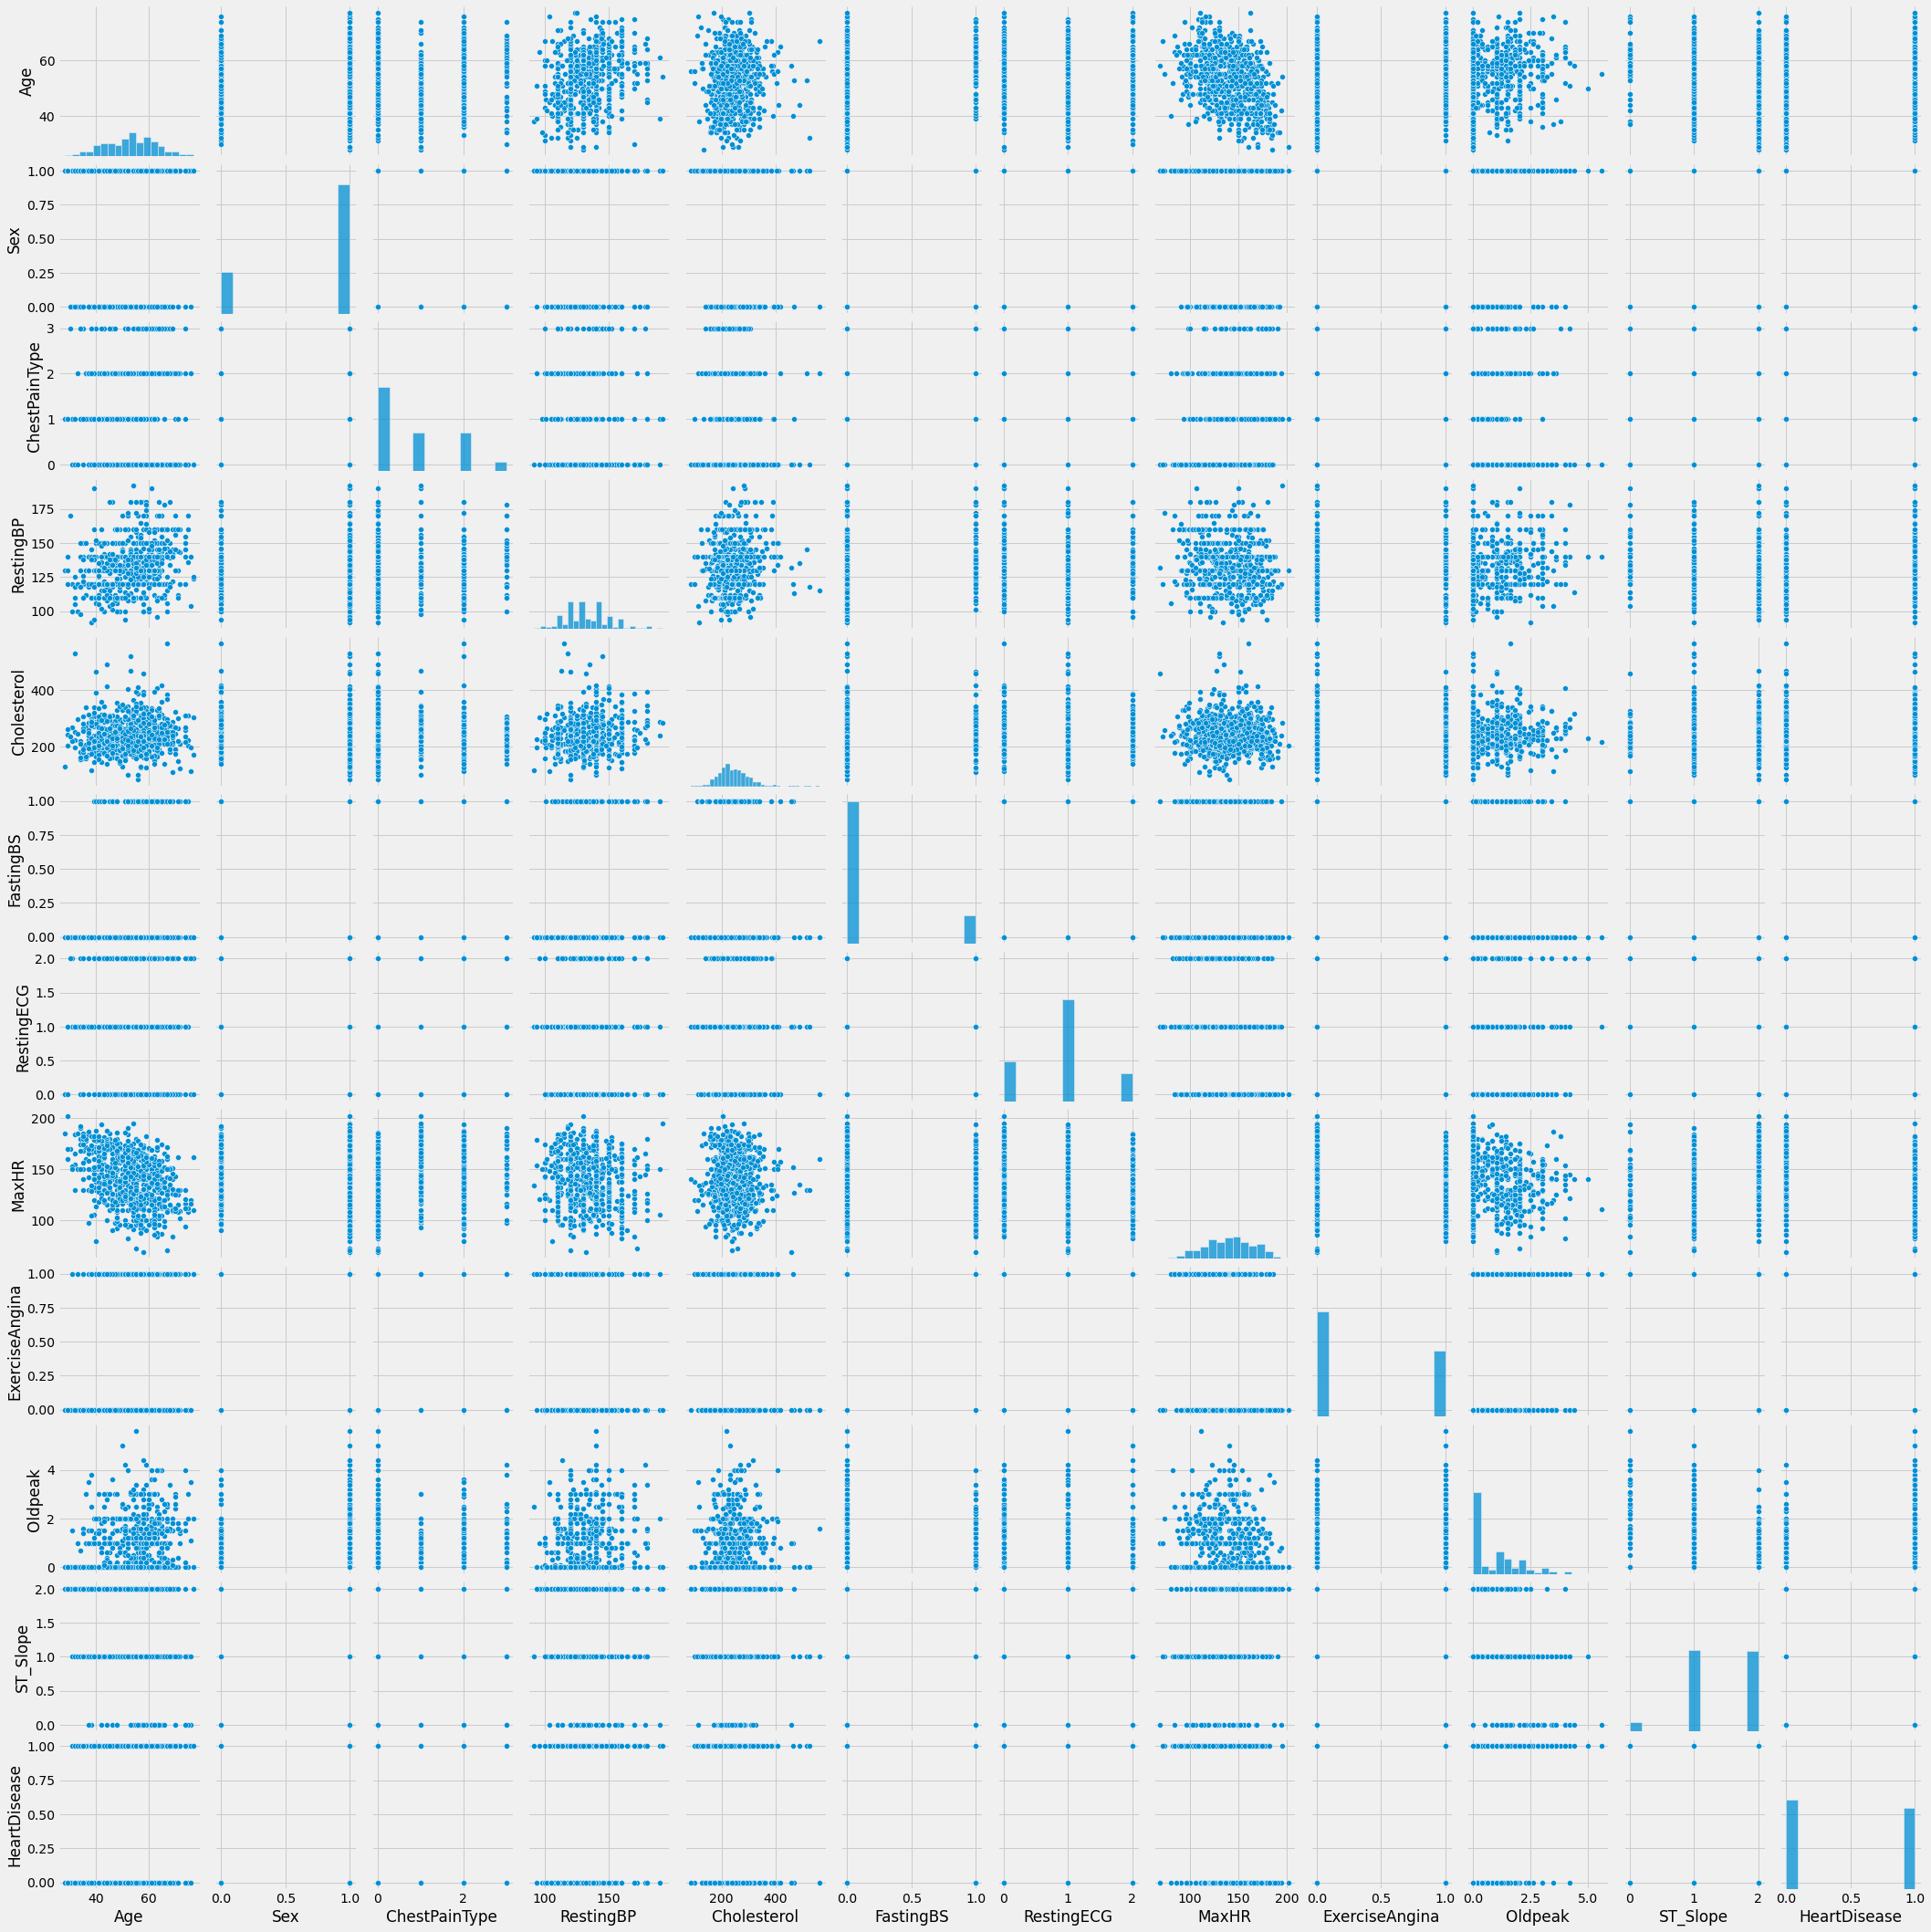

In [28]:
sns.pairplot(df_copy)

**How does Age affect max heart rate?**

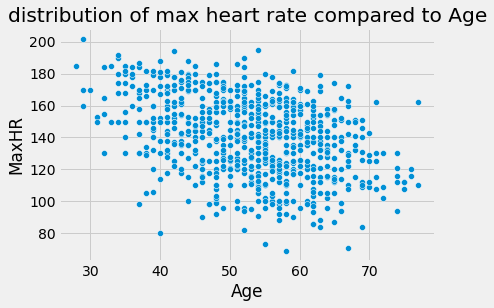

In [29]:
sns.scatterplot(data= df_copy, x="Age", y="MaxHR");
plt.title('distribution of max heart rate compared to Age');

**Liklihood of Max heart rate being big while age increasing decreases.**

**We can now make a logistic regression to predict heart diseas in indviduals with 70% training set and 30% validation set**

In [30]:
X = df_copy
y = X.pop('HeartDisease')
X.drop(columns = ['RestingBP','Cholesterol','RestingECG'] , inplace = True)#useless features

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Building a model using gradient boost classification which is immuned to correlation between features we got an accuracy 86.54708520179372% which is promising that we could build more trusted model if we had enough data to use a deep learning**

In [32]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
#Setting parameters
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.67423,
              max_delta_step=0, max_depth=18, min_child_weight=1,
              monotone_constraints='()', n_estimators=1000, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print ('model accuracy on predicting is: '+str(accuracy)+'%')

model accuracy on predicting is: 86.54708520179372%


In [54]:
def Pie_chart(df,c,target):
    fig, ax = plt.subplots(ncols=df[c].nunique(), figsize=(12,12))
    p = 0
    for i in df[c].unique():
        ax[p].set_title('-'*20+'\n'+str(c)  +' : '+ str(i) +'\nAccording to HeartDisease', size=11, fontweight='heavy')
        patches, texts, pcts = ax[p].pie(df[df[c]==i][target].value_counts().values,
                labels=df[df[c]==i][target].value_counts().index,
                    autopct="%1.2f%%", startangle=90, colors=['white', 'blue'],
                    wedgeprops={"edgecolor":"black"})
        plt.setp(pcts, **{'color':'black','weight':'heavy','size':14})
        p += 1 

# Multivariate section

**Which gender is morelikely get heartdisease?**

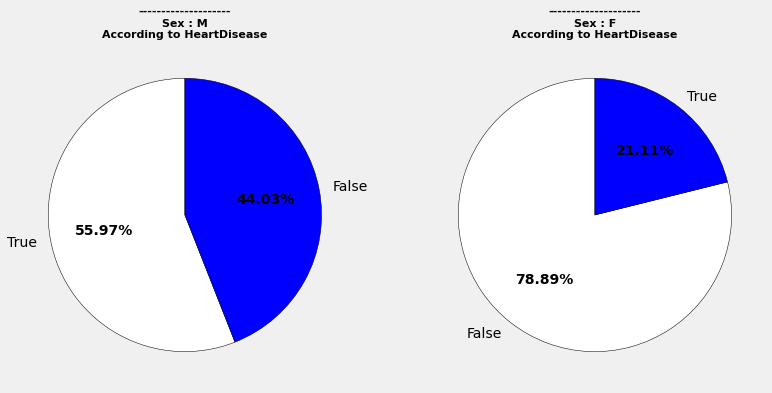

In [55]:
df_copy = df.copy()
df_copy['HeartDisease'] = df['HeartDisease'].astype(bool).astype(str)
Pie_chart(df_copy,'Sex','HeartDisease')

**Men are most likely**

**Does exercise Angina affect Heart disease ?**

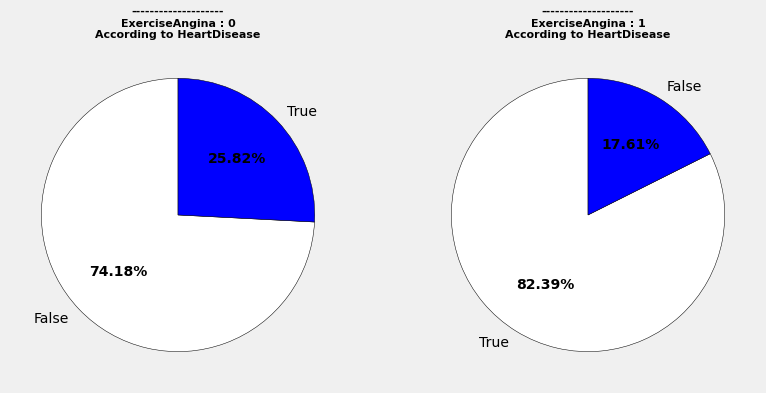

In [56]:
Pie_chart(df_copy,'ExerciseAngina','HeartDisease')

**Yes it mostlikely to get heart disease with 82.39%**

**What is most effective S_T slope**

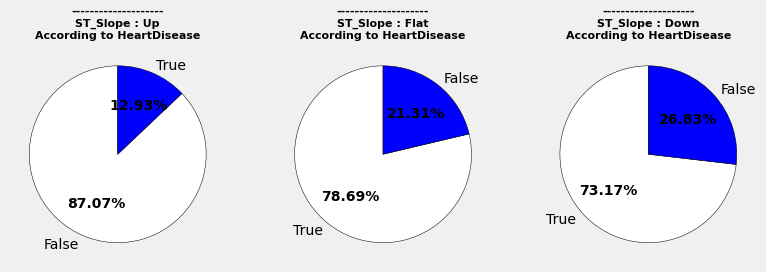

In [57]:
Pie_chart(df_copy,'ST_Slope','HeartDisease')

**mostlikely to not get heart disease with 87.07%**

**does chest pain type effect?**

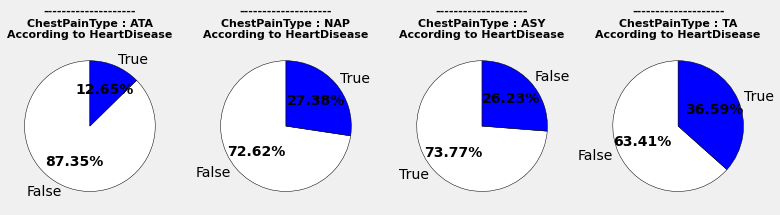

In [58]:
Pie_chart(df_copy,'ChestPainType','HeartDisease')

**yes it does**

**What is the distribution of HeartDisease of that?**

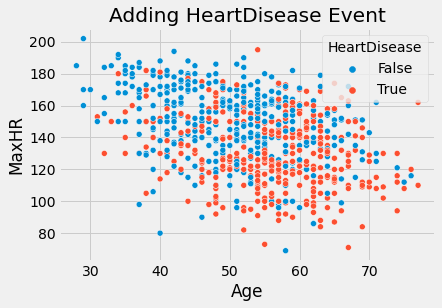

In [38]:
plt.title('Adding HeartDisease Event');
sns.scatterplot(data = df_copy, x = "Age", y = "MaxHR" , hue = "HeartDisease");

**Heart disease more likley in old age despite Max heart rate**

# Conclusions:
**limitation We could have built a stronger model if we got more enough data**

1-S_T slope highly correlated with heart disease

2-data has been gathered from males more than females however heart disease more likely to occure in men than females

3-ExerciseAngina more likely to keep heart diseas away if it's false

4-if ST_slope tends to be Flat or down individual more likely to get a heart disease

5-if ST_slope tends to be Up individual more likely to get a heart disease